# IMPUTACIÓN DE DATOS EN DEVOLUCIONES.XLSX


In [21]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt



In [22]:
# Cargamos el datafreame
df = pd.read_excel('devoluciones.xlsx')
df.head(10)

,Unnamed: 0,TIP_DOC,CVE_DOC,CVE_CLPV,STATUS,CVE_VEND,CVE_PEDI,FECHA_DOC,FECHA_ENTREGA,FECHA_VEN,FECHA_CANCELA,CANTD_TOT,DES_FIN,FECHA_ELAB,RFC,SERIE,FOLIO,DOC_ANT
0,0,D,D00501,1703,E,1.0,PV00039,2019-09-30,2019-09-06,2019-09-30,NaT,50994.00,0,2019-09-30 18:29:49,INE 911127 JG1,D,501,F29599
1,1,D,DEV0000000001,1852,E,2.0,F29896,2019-10-09,2019-09-17,2019-10-09,NaT,7125.90,0,2019-10-09 14:58:36,IPM-620322-6B4,DEV,1,F29596
2,2,D,DEV00002,5149,E,2.0,F29604,2019-10-10,2019-09-23,2019-10-10,NaT,2726.52,0,2019-10-10 13:41:27,LGV-000406-U16,DEV,2,F29604
3,3,D,DEV00003,3222,E,2.0,F29605,2019-10-10,2019-09-23,2019-10-10,NaT,1363.26,0,2019-10-10 13:49:44,LGQ-020801-KQ3,DEV,3,F29605
4,4,D,DEV00004,664,E,2.0,F29616,2019-10-10,2019-09-18,2019-10-10,NaT,4232.25,0,2019-10-10 14:12:13,CID-910926-P7A,DEV,4,F29616
5,5,D,DEV00005,664,E,2.0,PV00046/47,2019-10-10,2019-09-25,2019-10-10,NaT,10463.01,0,2019-10-10 14:24:33,CID-910926-P7A,DEV,5,F29614
6,6,D,DEV00006,6177,E,2.0,F29625,2019-10-16,2019-09-24,2019-10-16,NaT,4135.70,0,2019-10-16 15:24:32,EPS131107670,DEV,6,F29625
7,7,D,DEV00007,4779,C,1.0,F29489,2019-10-17,2019-09-12,2019-10-17,2019-10-17,24408.00,0,2019-10-17 10:28:32,TME001025LP0,DEV,7,F29489
8,8,D,DEV00008,4779,E,1.0,F29489,2019-10-17,2019-09-12,2019-10-17,NaT,24408.00,0,2019-10-17 11:00:25,TME001025LP0,DEV,8,F29489
9,9,D,DEV00009,5894,E,3.0,JOV0089,2019-10-31,2019-10-09,2019-10-31,NaT,986.25,0,2019-10-31 09:28:48,ICE310522683,DEV,9,F29897


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     194 non-null    int64         
 1   TIP_DOC        194 non-null    object        
 2   CVE_DOC        194 non-null    object        
 3   CVE_CLPV       194 non-null    object        
 4   STATUS         194 non-null    object        
 5   CVE_VEND       191 non-null    float64       
 6   CVE_PEDI       188 non-null    object        
 7   FECHA_DOC      194 non-null    datetime64[ns]
 8   FECHA_ENTREGA  194 non-null    datetime64[ns]
 9   FECHA_VEN      194 non-null    datetime64[ns]
 10  FECHA_CANCELA  7 non-null      datetime64[ns]
 11  CANTD_TOT      194 non-null    float64       
 12  DES_FIN        194 non-null    int64         
 13  FECHA_ELAB     194 non-null    datetime64[ns]
 14  RFC            194 non-null    object        
 15  SERIE          194 non-

<Axes: >

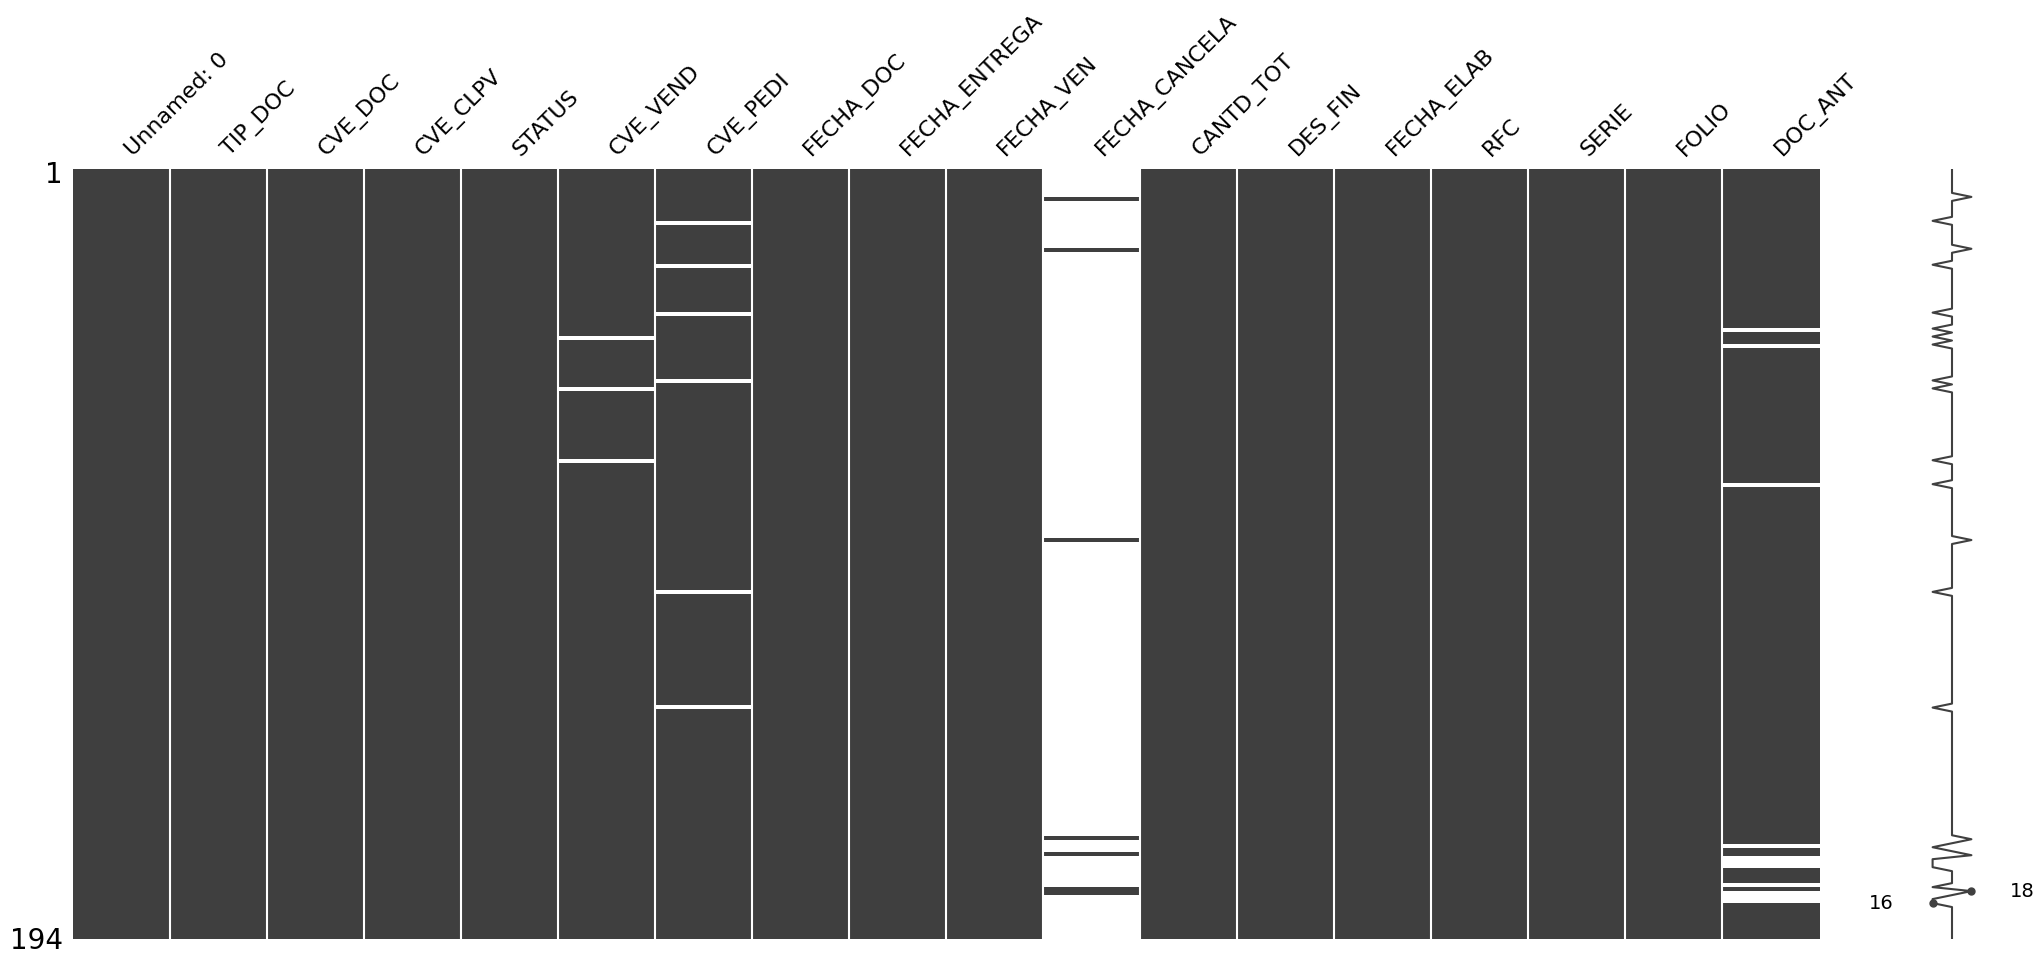

In [24]:
#identificamos los valores nulos
msno.matrix(df)

In [25]:
#Cuanttficamos los valores nulos
df.isnull().sum()

Unnamed: 0         0
TIP_DOC            0
CVE_DOC            0
CVE_CLPV           0
STATUS             0
CVE_VEND           3
CVE_PEDI           6
FECHA_DOC          0
FECHA_ENTREGA      0
FECHA_VEN          0
FECHA_CANCELA    187
CANTD_TOT          0
DES_FIN            0
FECHA_ELAB         0
RFC                0
SERIE              0
FOLIO              0
DOC_ANT           11
dtype: int64

En la columna CVE_VEND se le imuputará la mediana ya que al ser un dato flotante se le puede hacer una tecnica un poco menos agresiva con outliers



In [26]:
#imputamos la mediana de la columna CVE_VEND a los valores nulos
df['CVE_VEND'] = df['CVE_VEND'].fillna(df['CVE_VEND'].median())

Se decide imputar una fecha cero, que significa que es que no hubo devolución y no generar conflicto de tipo de dato


In [27]:
#imputamos una fecha fija a los valores nulos de la columna FECHA_CANCELA
df['FECHA_CANCELA'] = df['FECHA_CANCELA'].fillna('0000-01-01')


Se imputa un "no disponible" en la columna CVE_PEDI, y DOC_ANT ya que no es posible acceder a esa información en este momento


In [28]:
#Se imputa 'no disponible' en la columna CVE_PEDI a los valores nulos
df['CVE_PEDI'] = df['CVE_PEDI'].fillna('no disponible')


In [29]:
#Se imputa 'no disponible' en la columna DOC_ANT a los valores nulos
df['DOC_ANT'] = df['DOC_ANT'].fillna('no disponible')



In [30]:
#Verificamos que ya no hay valores nulos
df.isnull().sum()

Unnamed: 0       0
TIP_DOC          0
CVE_DOC          0
CVE_CLPV         0
STATUS           0
CVE_VEND         0
CVE_PEDI         0
FECHA_DOC        0
FECHA_ENTREGA    0
FECHA_VEN        0
FECHA_CANCELA    0
CANTD_TOT        0
DES_FIN          0
FECHA_ELAB       0
RFC              0
SERIE            0
FOLIO            0
DOC_ANT          0
dtype: int64

<Axes: >

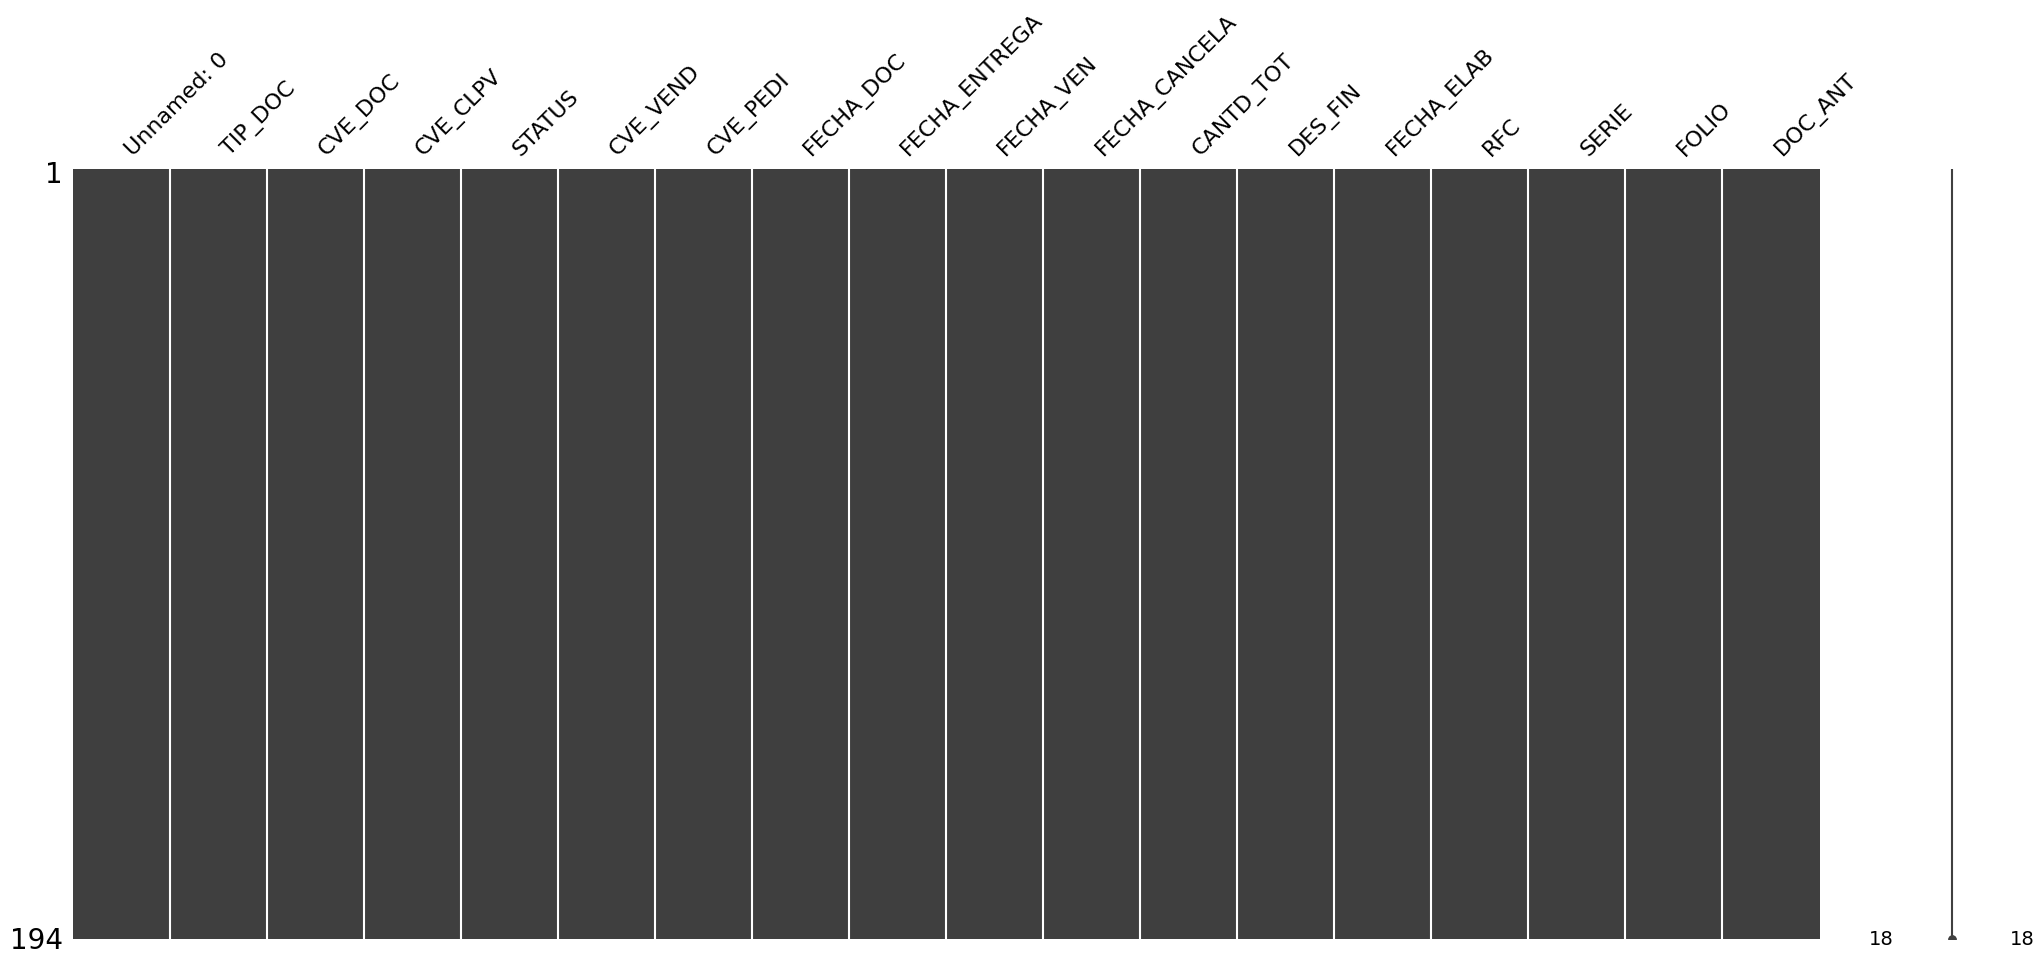

In [31]:
#visualizamos los datos imputados
msno.matrix(df)

In [32]:
#Exportamos el dataframe limpio en scv
df.to_csv('devoluciones_limpio.csv', index=False)
